# Squad 2.0 Dataset EDA
### Import libraries and setup environment

In [12]:
import os 
import json
import pprint
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd /content/drive/MyDrive/W266/Question_Answering

/content/drive/MyDrive/W266/Question_Answering


### Import data and preview

In [34]:
#Open training data
with open('train-v2.0.json') as json_file:
    train_data = json.load(json_file)

In [35]:
#Preview training data
pprint.pprint(train_data['data'][0])

Streaming output truncated to the last 5000 lines.
                            'Train Lady of Soul Awards for Best R&B/Soul Album '
                            'of the Year, Best R&B/Soul or Rap New Artist, and '
                            'Best R&B/Soul Single for "No, No, No". The group '
                            'released their multi-platinum second album The '
                            "Writing's on the Wall in 1999. The record "
                            "features some of the group's most widely known "
                            'songs such as "Bills, Bills, Bills", the group\'s '
                            'first number-one single, "Jumpin\' Jumpin\'" and '
                            '"Say My Name", which became their most successful '
                            'song at the time, and would remain one of their '
                            'signature songs. "Say My Name" won the Best R&B '
                            'Performance by a Duo or Group with Vocals and the

In [20]:
#Open dev data
with open('dev-v2.0.json') as json_file:
    dev_data = json.load(json_file)

In [21]:
#Preview dev data
pprint.pprint(dev_data['data'][0])

{'paragraphs': [{'context': 'The Normans (Norman: Nourmands; French: Normands; '
                            'Latin: Normanni) were the people who in the 10th '
                            'and 11th centuries gave their name to Normandy, a '
                            'region in France. They were descended from Norse '
                            '("Norman" comes from "Norseman") raiders and '
                            'pirates from Denmark, Iceland and Norway who, '
                            'under their leader Rollo, agreed to swear fealty '
                            'to King Charles III of West Francia. Through '
                            'generations of assimilation and mixing with the '
                            'native Frankish and Roman-Gaulish populations, '
                            'their descendants would gradually merge with the '
                            'Carolingian-based cultures of West Francia. The '
                            'distinct cultural and et

### Look into number of questions

In [57]:
#Count number of questions 
def total_question_count(data):
  num_para = 0
  num_ques = 0
  num_impos_ques = 0
  for i in range(len(data['data'])):
    num_para += len(data['data'][i]['paragraphs'])
    for j in range(len(data['data'][i]['paragraphs'])):
      num_ques += len(data['data'][i]['paragraphs'][j]['qas'])
      for k in range(len(data['data'][i]['paragraphs'][j]['qas'])):
        if data['data'][i]['paragraphs'][j]['qas'][k]['is_impossible'] == True:
          num_impos_ques += 1
  print('The total number of paragraphs in the dataset is', num_para)
  print('The total number of questions in the dataset is', num_ques)
  print('The total number of question without an answer is', num_impos_ques)
  return num_para, num_ques, num_impos_ques

In [62]:
#Total question counts for training data overview
train_para_count, train_ques_count, train_impos_count = total_question_count(train_data)

The total number of paragraphs in the dataset is 19035
The total number of questions in the dataset is 130319
The total number of question without an answer is 43498


In [60]:
#Total question counts for dev data overview
dev_para_count, dev_ques_count, dev_impos_count = total_question_count(dev_data)

The total number of paragraphs in the dataset is 1204
The total number of questions in the dataset is 11873
The total number of question without an answer is 5945


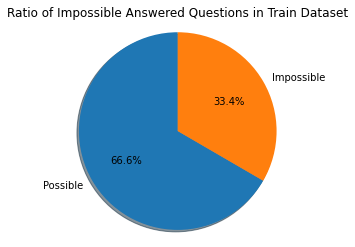

In [66]:
#Ratio of impossible question from training data overview
train_impos = train_impos_count / train_ques_count
train_pos = 1 - train_impos
plt.pie([train_pos, train_impos], labels = ['Possible','Impossible']
        , autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Ratio of Impossible Answered Questions in Train Dataset')
plt.show()

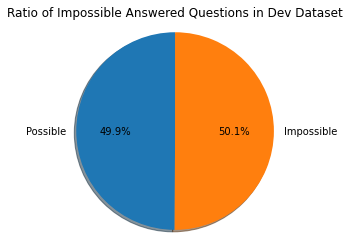

In [65]:
#Ratio of impossible question from dev data overview\n",
dev_impos = dev_impos_count / dev_ques_count
dev_pos = 1 - dev_impos
plt.pie([dev_pos, dev_impos], labels = ['Possible','Impossible']
        , autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Ratio of Impossible Answered Questions in Dev Dataset')
plt.show()

In [67]:
#Define the length of context
def context_length(data):
    lengths = []
    for i in range(len(data['data'])):
        for j in range(len(data['data'][i]['paragraphs'])):
            length = len(data['data'][i]['paragraphs'][j]['context'])
            lengths.append(length)
    return lengths

In [68]:
#Look into the context length for training data\n",
train_context_lengths = context_length(train_data)
print('Shortest context in the training data is', min(train_context_lengths))
print('Longest context in the training data is', max(train_context_lengths))
print('The average length of context in the training data is', 
      sum(train_context_lengths) / len(train_context_lengths))

Shortest context in the training data is 151
Longest context in the training data is 3706
The average length of context in the training data is 735.5478854741266


In [70]:
#Look into the context length for dev data
dev_context_lengths = context_length(dev_data)
print('Shortest context in the dev data is', min(dev_context_lengths))
print('Longest context in the dev data is', max(dev_context_lengths))
print('The average length of context in the dev data is', 
      sum(dev_context_lengths) / len(dev_context_lengths))

Shortest context in the dev data is 169
Longest context in the dev data is 4063
The average length of context in the dev data is 802.6121262458472


In [71]:
#Define the length of question
def question_length(data):
    lengths = []
    index = []
    for i in range(len(data['data'])):
        for j in range(len(data['data'][i]['paragraphs'])):
            for k in range(len(data['data'][i]['paragraphs'][j]['qas'])):
                length = len(data['data'][i]['paragraphs'][j]['qas'][k]['question'])
                index.append([i, j, k])
                lengths.append(length)
    return lengths, index

In [72]:
#Look into the question length for training data
train_question_lengths, train_question_index = question_length(train_data)
print('Shortest question in the training data is', min(train_question_lengths))
print('Longest question in the training data is', max(train_question_lengths))
print('The average length of question in the training data is',
      sum(train_question_lengths) / len(train_question_lengths))

Shortest question in the training data is 1
Longest question in the training data is 25651
The average length of question in the training data is 58.50773870272178


In [73]:
#Look into the question length for dev data
dev_question_lengths, dev_question_index = question_length(dev_data)
print('Shortest question in the dev data is', min(dev_question_lengths))
print('Longest question in the dev data is', max(dev_question_lengths))
print('The average length of question in the dev data is', sum(dev_question_lengths) / len(dev_question_lengths))

Shortest question in the dev data is 12
Longest question in the dev data is 197
The average length of question in the dev data is 59.50619051629748


In [80]:
#Look into the long question length in training dateset
for i, j, k in train_question_index:
  if len(train_data['data'][i]['paragraphs'][j]['qas'][k]['question']) > 500:
    print('The index of quetion is:', i, j, k)
    print('The question is:', train_data['data'][i]['paragraphs'][j]['qas'][k]['question'])
#The longest question is having huge number of spaces which is unnormal

The index of quetion is: 367 13 1
The question is:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [82]:
#Remove the unnormal question and find out the training data length distribution
train_question_lengths.remove(max(train_question_lengths))
print('Shortest question in the training data is', min(train_question_lengths))
print('Longest question in the training data is', max(train_question_lengths))
print('The average length of question in the training data is',
      sum(train_question_lengths) / len(train_question_lengths))

Shortest question in the training data is 1
Longest question in the training data is 256
The average length of question in the training data is 58.309729352271766


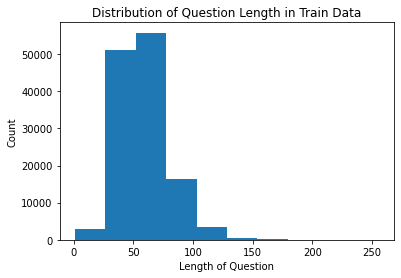

In [86]:
#Plot the distribution of question length in training data
plt.hist(train_question_lengths)
plt.title('Distribution of Question Length in Train Data')
plt.xlabel('Length of Question')
plt.ylabel('Count')
plt.show()

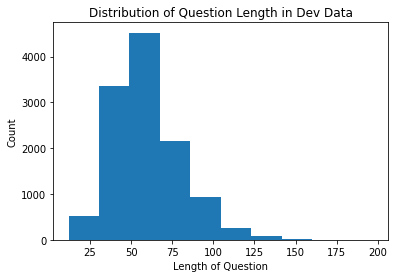

In [87]:
#Plot the distribution of question length in dev data
plt.hist(dev_question_lengths)
plt.title('Distribution of Question Length in Dev Data')
plt.xlabel('Length of Question')
plt.ylabel('Count')
plt.show()

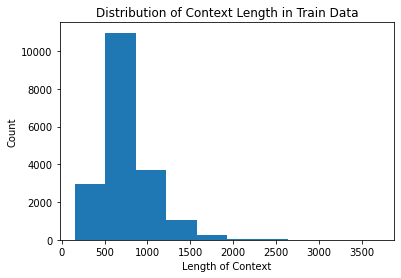

In [88]:
#Plot the distribution of context length in training data
plt.hist(train_context_lengths)
plt.title('Distribution of Context Length in Train Data')
plt.xlabel('Length of Context')
plt.ylabel('Count')
plt.show()

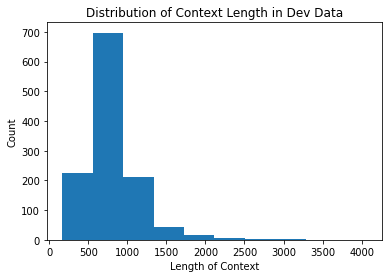

In [89]:
#Plot the distribution of context length in dev data
plt.hist(dev_context_lengths)
plt.title('Distribution of Context Length in Dev Data')
plt.xlabel('Length of Context')
plt.ylabel('Count')
plt.show()